# Iris flower dataset

The [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a common dataset used in machine learning.

It has been created Ronald Fisher in 1936. It contains the petal length, petal width, sepal length and sepal width of 150 iris flowers from 3 different species.

Dataset has been downloaded from [Kaggle](https://www.kaggle.com/uciml/iris).

To go through this example, you need to install AutoClassWrapper:
```bash
$ python3 -m pip install autoclasswrapper
```

[AutoClass C](https://ti.arc.nasa.gov/tech/rse/synthesis-projects-applications/autoclass/autoclass-c/) also needs to be installed locally and available in path.

Here is a quick solution for a Linux Bash shell:
```bash
wget https://ti.arc.nasa.gov/m/project/autoclass/autoclass-c-3-3-6.tar.gz
tar zxvf autoclass-c-3-3-6.tar.gz
rm -f autoclass-c-3-3-6.tar.gz
export PATH=$PATH:$(pwd)/autoclass-c

# if you use a 64-bit operating system,
# you also need to install the standard 32-bit C libraries:
# sudo apt-get install -y libc6-i386
```

In [1]:
from pathlib import Path
import sys
import time

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

%matplotlib inline

print("Python:", sys.version)
print("matplotlib:", matplotlib.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)

import autoclasswrapper as wrapper
print("AutoClassWrapper:", wrapper.__version__)

version = sys.version_info 
if not ((version.major >= 3) and (version.minor >= 6)):
    sys.exit("Need Python>=3.6")

Python: 3.7.1 | packaged by conda-forge | (default, Feb 26 2019, 04:48:14) 
[GCC 7.3.0]
matplotlib: 3.0.3
numpy: 1.16.2
pandas: 0.24.1
AutoClassWrapper: 1.4.1


## Dataset preparation

In [2]:
df = pd.read_csv("iris.csv", index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Add discrete values

Apart iris species, data in this dataset are numerical values only.

To demonstrate the ability of AutoClass C to handle discrete values, we will convert `PetalWidthCm` column to discrete categorical values.

In [4]:
def categorize(value):
    if value <= 0.75:
        return "small"
    elif 0.75 < value <= 1.75:
        return "medium"
    elif 1.75 < value:
        return "large"

In [5]:
df["PetalWidthCat"] = df["PetalWidthCm"].apply(categorize)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalWidthCat
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,small
2,4.9,3.0,1.4,0.2,Iris-setosa,small
3,4.7,3.2,1.3,0.2,Iris-setosa,small
4,4.6,3.1,1.5,0.2,Iris-setosa,small
5,5.0,3.6,1.4,0.2,Iris-setosa,small


### Add missing values

To demonstrate the ability of AutoClass C to handle missing values, we will delete some values.

In [6]:
df.loc[1, "SepalLengthCm"] = np.nan
df.loc[2, "SepalWidthCm"] = np.nan
df.loc[3, "PetalLengthCm"] = np.nan
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalWidthCat
Id,,,,,,
1,NaN,3.5,1.4,0.2,Iris-setosa,small
2,4.9,NaN,1.4,0.2,Iris-setosa,small
3,4.7,3.2,NaN,0.2,Iris-setosa,small
4,4.6,3.1,1.5,0.2,Iris-setosa,small
5,5.0,3.6,1.4,0.2,Iris-setosa,small


Save dataset in two different files. One with real values and the other one with discrete values (column `PetalWidthCat`).
Missing values must encoded with nothing.

In [7]:
df.drop(["Species", "PetalWidthCm", "PetalWidthCat"], axis=1).to_csv("iris_real.tsv", sep="\t", header=True)
!head iris_real.tsv

Id	SepalLengthCm	SepalWidthCm	PetalLengthCm
1		3.5	1.4
2	4.9		1.4
3	4.7	3.2	
4	4.6	3.1	1.5
5	5.0	3.6	1.4
6	5.4	3.9	1.7
7	4.6	3.4	1.4
8	5.0	3.4	1.5
9	4.4	2.9	1.4


In [8]:
df["PetalWidthCat"].to_csv("iris_discrete.tsv", sep="\t", header=True)
!head iris_discrete.tsv

Id	PetalWidthCat
1	small
2	small
3	small
4	small
5	small
6	small
7	small
8	small
9	small


## Step 1 - prepare input files

In [9]:
# Create object to prepare dataset.
clust = wrapper.Input()

# Load datasets from tsv files.
clust.add_input_data("iris_real.tsv", "real scalar")
clust.add_input_data("iris_discrete.tsv", "discrete")

# Prepare input data:
# - create a final dataframe
# - merge datasets if multiple inputs
clust.prepare_input_data()

# Create files needed by AutoClass.
clust.create_db2_file()
clust.create_hd2_file()
clust.create_model_file()
# We wanted reproducible results to ease documentation.
# But bear in mind, that this parameter is not advised by authors of AutoClass C in production run.
# Use clust.create_sparams_file() instead.
clust.create_sparams_file(reproducible_run=True)
clust.create_rparams_file()

2019-07-07 19:07:58 INFO     Reading data file 'iris_real.tsv' as 'real scalar' with error 0.01
2019-07-07 19:07:58 INFO     Detected encoding: ascii
2019-07-07 19:07:59 INFO     Found 150 rows and 4 columns
2019-07-07 19:07:59 DEBUG    Checking column names
2019-07-07 19:07:59 DEBUG    Index name 'Id'
2019-07-07 19:07:59 DEBUG    Column name 'SepalLengthCm'
2019-07-07 19:07:59 DEBUG    Column name 'SepalWidthCm'
2019-07-07 19:07:59 DEBUG    Column name 'PetalLengthCm'
2019-07-07 19:07:59 INFO     Checking data format
2019-07-07 19:07:59 INFO     Column 'SepalLengthCm'
2019-07-07 19:07:59 INFO     count    149.000000
2019-07-07 19:07:59 INFO     mean       5.848322
2019-07-07 19:07:59 INFO     std        0.828594
2019-07-07 19:07:59 INFO     min        4.300000
2019-07-07 19:07:59 INFO     50%        5.800000
2019-07-07 19:07:59 INFO     max        7.900000
2019-07-07 19:07:59 INFO     ---
2019-07-07 19:07:59 INFO     Column 'SepalWidthCm'
2019-07-07 19:07:59 INFO     count    149.0000

## Step 2 - prepare run script & run autoclass

In [10]:
# Clean previous status file and results if a classification has already been performed.
!rm -f autoclass-run-* *.results-bin

# Search autoclass in path.
wrapper.search_autoclass_in_path()

# Create object to run AutoClass.
run = wrapper.Run()

# Prepare run script.
run.create_run_file()

# Run AutoClass.
run.run()

2019-07-07 19:08:02 INFO     AutoClass C executable found in /home/pierre/.soft/bin/autoclass
2019-07-07 19:08:02 INFO     Writing run file
2019-07-07 19:08:02 INFO     AutoClass C executable found in /home/pierre/.soft/bin/autoclass
2019-07-07 19:08:02 INFO     AutoClass C version: AUTOCLASS C (version 3.3.6unx)
2019-07-07 19:08:02 INFO     Running clustering...


## Step 3 - parse and format results

2019-07-07 19:08:05 INFO     Extracting autoclass results
2019-07-07 19:08:05 INFO     Found 150 cases classified in 4 classes
2019-07-07 19:08:05 INFO     Aggregating input data
2019-07-07 19:08:05 INFO     Writing classes + probabilities .tsv file
2019-07-07 19:08:05 INFO     Writing .cdt file
2019-07-07 19:08:05 INFO     Writing .cdt file (with probabilities)
2019-07-07 19:08:05 INFO     Writing class statistics
2019-07-07 19:08:05 INFO     Writing dendrogram


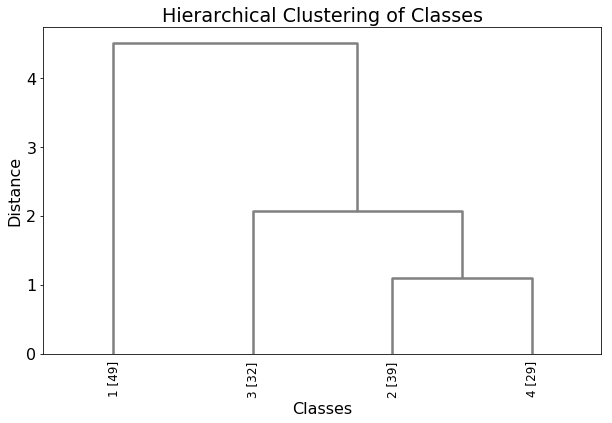

In [11]:
timer = 0
step = 2
while not Path("autoclass-run-success").exists():
    timer += step
    sys.stdout.write("\r")
    sys.stdout.write(f"Time: {timer} sec.")
    sys.stdout.flush()
    time.sleep(step)

results = wrapper.Output()
results.extract_results()
results.aggregate_input_data()
results.write_cdt()
results.write_cdt(with_proba=True)
results.write_class_stats()
results.write_dendrogram()

For comparison, add class number to original dataset.

In [12]:
df_class = pd.read_csv("autoclass_out.tsv", sep="\t", index_col="Id")
df = pd.concat([df, df_class["main-class"]], axis=1, join="outer")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalWidthCat,main-class
Id,,,,,,,
1,NaN,3.5,1.4,0.2,Iris-setosa,small,1
2,4.9,NaN,1.4,0.2,Iris-setosa,small,1
3,4.7,3.2,NaN,0.2,Iris-setosa,small,1
4,4.6,3.1,1.5,0.2,Iris-setosa,small,1
5,5.0,3.6,1.4,0.2,Iris-setosa,small,1


## Compute class distribution for iris species

In [13]:
pd.pivot_table(df, index=["Species"], columns=["main-class"], values=[], aggfunc=len, fill_value=0)

main-class,1,2,3,4
Species,,,,
Iris-setosa,50,0,0,0
Iris-versicolor,0,23,0,27
Iris-virginica,0,16,32,2


The setosa species is found only in cluster 1. Note that missing values did not interfere in the classification of the 3 first flowers as setosa.

The versicolor species is found in cluster 2 and 4.

The virginica species is found mainly in cluster 3 but also in cluster 2 and 4.

AutoClass-C determines automatically what is the optimal number of classes. It's always a good idea to analyse the final results to check if some cluster can be merged (for instance cluster 2 and 4).
